In [7]:
import torch
from diffusers import StableDiffusionPipeline
import os
from PIL import Image
import matplotlib.pyplot as plt

In [8]:
output_dir = "synthetic_image_dataset"
os.makedirs(output_dir, exist_ok=True)
print("Dataset folder created:", output_dir)

Dataset folder created: synthetic_image_dataset


In [9]:
model_id = "runwayml/stable-diffusion-v1-5"

pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16
)

pipe = pipe.to("cuda")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [13]:
prompts = [
    "A futuristic city with flying cars at sunset",
    "A robot reading a book in a library",
    "A peaceful mountain landscape with a lake",
    "A cyberpunk street at night with neon lights",
    "An astronaut walking on Mars"
]

In [14]:
for i, prompt in enumerate(prompts):
    image = pipe(prompt).images[0]
    image_path = os.path.join(output_dir, f"image_{i+1}.png")
    image.save(image_path)
    print(f"Saved: {image_path}")

print("Synthetic dataset generation completed!")

  0%|          | 0/50 [00:00<?, ?it/s]

Saved: synthetic_image_dataset/image_1.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: synthetic_image_dataset/image_2.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: synthetic_image_dataset/image_3.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: synthetic_image_dataset/image_4.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: synthetic_image_dataset/image_5.png
Synthetic dataset generation completed!


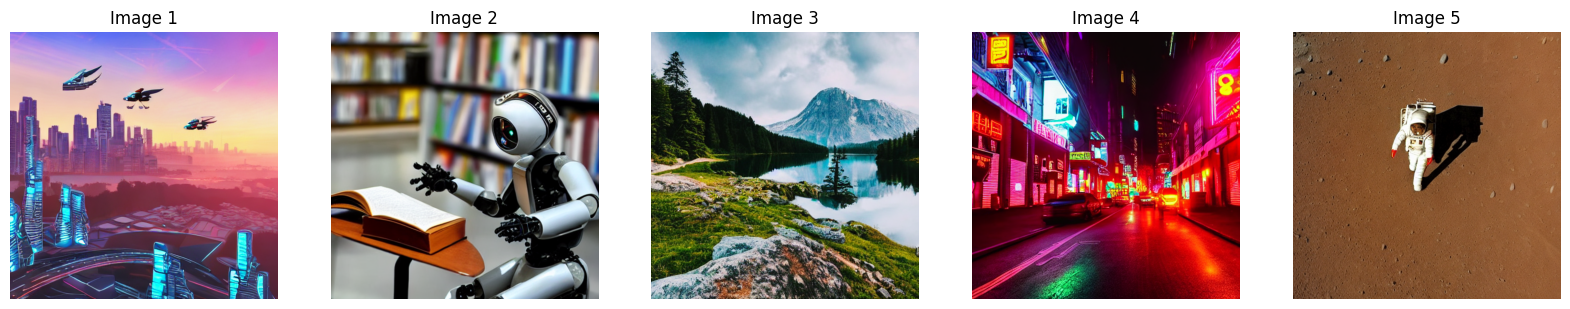

In [15]:
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

for i in range(5):
    img = Image.open(f"synthetic_image_dataset/image_{i+1}.png")
    axes[i].imshow(img)
    axes[i].axis("off")
    axes[i].set_title(f"Image {i+1}")

plt.show()